In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('C:/Users/abhay/machine learning/codsoft/fraud detection/fraudTrain.csv', index_col='Unnamed: 0')
df_test = pd.read_csv('C:/Users/abhay/machine learning/codsoft/fraud detection/fraudTest.csv', index_col='Unnamed: 0')

In [3]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [6]:
df_train.shape

(1296675, 22)

In [7]:
df_train.value_counts

<bound method DataFrame.value_counts of         trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Herm

In [8]:
df_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
# checking any null value 
df_train.isnull().values.any()

False

In [10]:
df_test.isnull().values.any()

False

In [11]:
df_combined = pd.concat([df_train,df_test],axis=0)

In [12]:
df_combined.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
df_combined.shape

(1852394, 22)

In [14]:
df_combined.size

40752668

In [15]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int64(5),

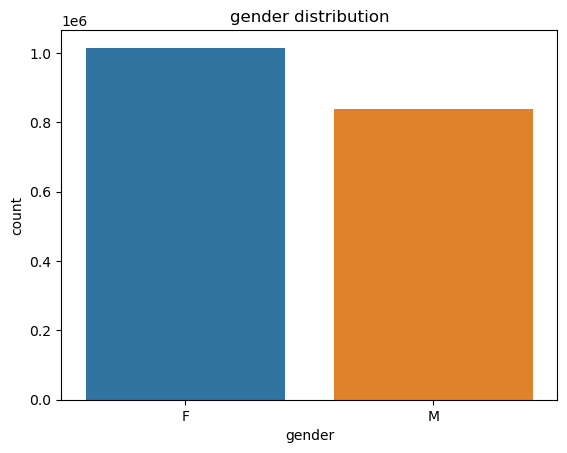

In [16]:
# visualizing data 
sns.countplot(x='gender',data=df_combined)
plt.title("gender distribution")
plt.show()

In [17]:
df_combined=df_combined.drop(labels=['first','last','job','trans_num','street','trans_date_trans_time','city','state','dob'],axis=1)

In [18]:
df_combined.head()

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [19]:
# checking correlation
# correlation_matrix = df_combined.corr()
# plt.figure(figsize=(15,10))
# sns.heatmap(correlation_matrix,cmap='coolwarm',annot=False,fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

In [20]:
# preprocessing the data 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
new_col = encoder.fit_transform(df_combined['merchant'].values)
df_combined['merchant_new'] = new_col
df_combined.drop(labels=['merchant'],axis=1,inplace=True)

In [22]:
new_col1 = encoder.fit_transform(df_combined['category'].values)
df_combined['category_new'] = new_col1
df_combined.drop(labels=['category'],axis=1,inplace=True)

In [23]:
new_col2 = encoder.fit_transform(df_combined['gender'].values)
df_combined['gender_new'] = new_col2
df_combined.drop(labels=['gender'],axis=1,inplace=True)

In [24]:
df_combined.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_new
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,514,8,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,241,4,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,390,0,1
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,360,2,1
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,297,9,1


In [25]:
# train test split 
from sklearn.model_selection import train_test_split
X = df_combined.drop('is_fraud',axis=1)
y = df_combined['is_fraud']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=30)

In [27]:
X_train,y_train

(                   cc_num     amt    zip      lat      long  city_pop  \
 464557      4755696071492   45.51  75048  32.9643  -96.6012     20328   
 1293012  3568255211412877   63.48  46765  41.2249  -85.0301      5341   
 573175   6501313409525696   65.45  79772  31.4467 -103.5791     12747   
 169221   6564459919350820    8.01  53803  42.5545  -90.3508      1306   
 451462    213153151785052   60.36  54487  45.4963  -89.7273      9594   
 ...                   ...     ...    ...      ...       ...       ...   
 882485   3556613125071656    4.37  77566  29.0393  -95.4401     28739   
 328599   2284059275940012    8.70  47032  39.0945  -85.0638      3289   
 570508   6011681934117244   28.84  37165  36.2835  -87.4581        70   
 324234   3551217896304745  195.43  12986  44.2320  -74.4905      6120   
 431909   4452366298769043   10.46  76626  32.0758  -96.7010      1563   
 
           unix_time  merch_lat  merch_long  merchant_new  category_new  \
 464557   1343083738  33.235843  -9

## trainig model 

In [28]:
# logistic regression 
from sklearn.linear_model import LogisticRegression

In [29]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred=model.predict(X_test)

In [31]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,r2_score

In [33]:
LR_accuracy=accuracy_score(y_test,y_pred)

In [34]:
print("logistic regression:")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy:",LR_accuracy)
print("r2_score:",r2_score(y_test,y_pred))

logistic regression:
[[460664      0]
 [  2435      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    460664
           1       0.00      0.00      0.00      2435

    accuracy                           0.99    463099
   macro avg       0.50      0.50      0.50    463099
weighted avg       0.99      0.99      0.99    463099

accuracy: 0.9947419450268733
r2_score: -0.005285848253824943


In [35]:
# decision tree model
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=2)

In [36]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [37]:
y_pred2 = model2.predict(X_test) 

In [38]:
DT_accuracy=accuracy_score(y_test,y_pred2)
print("decision tree model:")
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print("accuracy:",DT_accuracy)
print("r2_score:",r2_score(y_test,y_pred2))

decision tree model:
[[460664      0]
 [  2435      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    460664
           1       0.00      0.00      0.00      2435

    accuracy                           0.99    463099
   macro avg       0.50      0.50      0.50    463099
weighted avg       0.99      0.99      0.99    463099

accuracy: 0.9947419450268733
r2_score: -0.005285848253824943


In [39]:
# random forest model 
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred3 = model3.predict(X_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
RF_accuracy=accuracy_score(y_test,y_pred3)
print("decision tree model:")
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print("accuracy:",RF_accuracy)
print("r2_score:",r2_score(y_test,y_pred3))

decision tree model:
[[460414    250]
 [   858   1577]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    460664
           1       0.86      0.65      0.74      2435

    accuracy                           1.00    463099
   macro avg       0.93      0.82      0.87    463099
weighted avg       1.00      1.00      1.00    463099

accuracy: 0.9976074230348154
r2_score: 0.5425639754146867


In [43]:
algorithm=['LogisticRegression', 'Decision tree classifier','Random forest classifier']
accuracy= [LR_accuracy, DT_accuracy,RF_accuracy]
FinalResult=pd.DataFrame({'Algorithm':algorithm, 'Accuracy':accuracy})
FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.994742
1,Decision tree classifier,0.994742
2,Random forest classifier,0.997607
